# Twitch Top 1000 Streamers - EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use("cyberpunk")

In [2]:
df = pd.read_csv("twitch-top1000-30days.csv")

In [3]:
df.head()

,Channel,Partner,Mature,Language,Date Created,Total Followers,Total Views,Average Viewers,Average Stream Duration,Game 1,Game 2,Game 3
0,xQcOW,True,False,English,12th Sep 2014,3304332,181684052,41867,10.6,Fall Guys,Among Us,Just Chatting
1,GamesDoneQuick,True,False,English,20th May 2011,1757864,316544272,20951,12.0,Pokémon Sword/Shield,The Legend of Zelda: Ocarina of Time,Final Fantasy VII Remake
2,Gaules,True,True,Portuguese,9th Nov 2017,1801190,168804695,12478,32.5,Counter-Strike: Global Offensive,Motorsport Manager,Sea of Thieves
3,NICKMERCS,True,False,English,13th Sep 2010,4164599,120040003,53908,6.8,Call of Duty: Modern Warfare,Fall Guys,Apex Legends
4,TimTheTatman,True,True,English,8th Oct 2012,5435934,204381030,54775,7.2,Call of Duty: Modern Warfare,Just Chatting,Fall Guys


In [4]:
df.dtypes

Channel                     object
Partner                       bool
Mature                        bool
Language                    object
Date Created                object
Total Followers              int64
Total Views                  int64
Average Viewers              int64
Average Stream Duration    float64
Game 1                      object
Game 2                      object
Game 3                      object
dtype: object

In [5]:
df.isnull().sum()
#null data for 'game' features means channel only played 1 or 2 games in 30 days

Channel                      0
Partner                      0
Mature                       0
Language                     0
Date Created                 0
Total Followers              0
Total Views                  0
Average Viewers              0
Average Stream Duration      0
Game 1                       0
Game 2                     136
Game 3                     220
dtype: int64

In [30]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.describe().T

#correlation between total followers and average viewers.
#average viewers seem to be about 1% (give or take) of total followers.

,count,mean,std,min,25%,50%,75%,max
Total Followers,1000,537065,922809,552,139373,283364,581746,14991941
Total Views,1000,32117504,70863599,1008,4616552,11850642,32962033,1227560187
Average Viewers,1000,5456,7964,293,1717,2822,5954,86824
Average Stream Duration,1000,10,20,1,5,6,8,359


In [7]:
#calucalate avg stream duration

#remove outliers (anyone streaming more than 24 hours at once) (removes 55 entries)
temp = df[df['Average Stream Duration'] <= 24]
temp = temp['Average Stream Duration'].head(50)
#print(len(temp))

#outliers = df[df['Average Stream Duration'] > 24]
#print(outliers["Channel"])

avg_stream_duration = temp.sum()/len(temp)
print(avg_stream_duration)

7.218


In [8]:
#function to check data for a specfic streamer
def streamer(channel_name):
        return df.loc[df['Channel'] == channel_name]

In [9]:
streamer('mang0')

,Channel,Partner,Mature,Language,Date Created,Total Followers,Total Views,Average Viewers,Average Stream Duration,Game 1,Game 2,Game 3
473,mang0,True,True,English,3rd Dec 2011,336736,16248059,1817,9.7,Fall Guys,Super Smash Bros. Melee,VALORANT


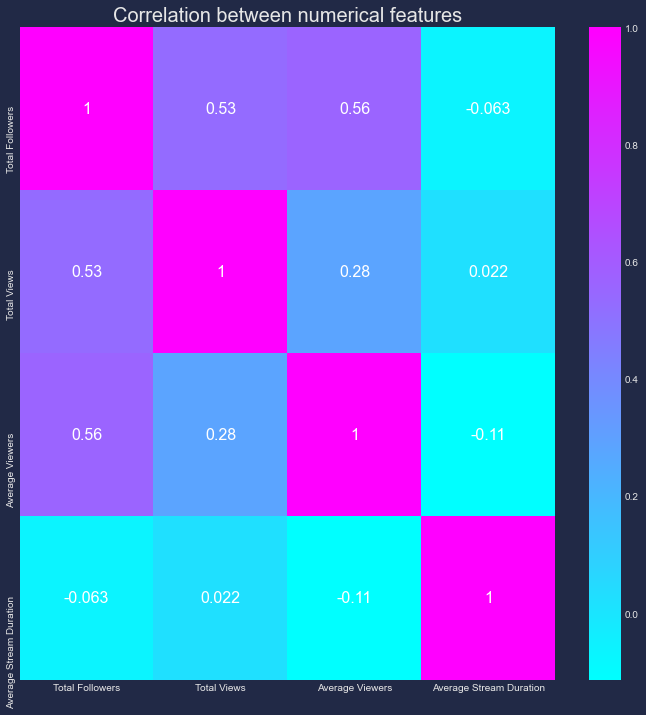

In [10]:
#create table for heatmap
temp = df.drop(['Channel', 'Mature', 'Partner', 'Language', 'Date Created', 'Game 1', 'Game 2', 'Game 3'], axis=1)

fig = plt.figure(figsize=(12, 12))
#correlation table for numerical features
sns.heatmap(temp.corr(), annot = True, cmap='cool', annot_kws={'size':16, 'color':'white'})
plt.title('Correlation between numerical features', fontsize = 20)

plt.savefig('imgs/corr.png', facecolor=fig.get_facecolor())
plt.show()

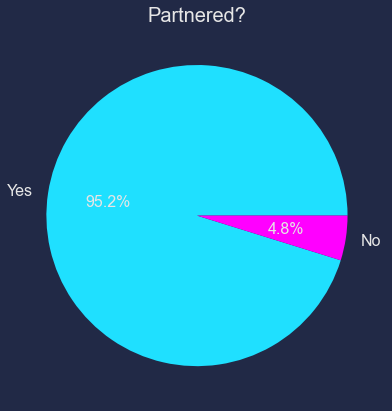

In [49]:
p = [df['Partner'].sum(), 1000 - df['Partner'].sum()]
l = ["Yes", "No"]
c = ["#1FE0FF", "#FF00FF"]

fig = plt.figure(figsize=(6, 6))
plt.title("Partnered?", fontsize= 20)
plt.pie(p, labels = l, colors=c, autopct='%1.1f%%', textprops={'fontsize': 16})

plt.tight_layout()
plt.savefig('imgs/partner.png', facecolor=fig.get_facecolor())
plt.show()  

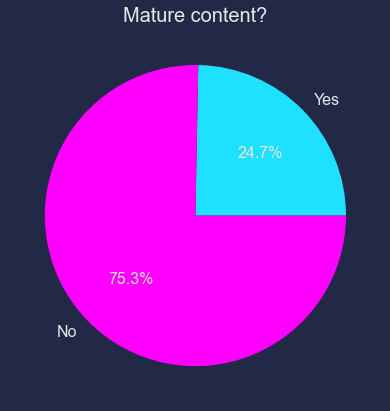

In [48]:
p = [df['Mature'].sum(), 1000 - df['Mature'].sum()]
l = ["Yes", "No"]
c = ["#1FE0FF", "#FF00FF"]

fig = plt.figure(figsize=(6, 6))
plt.title("Mature content?", fontsize= 20)
plt.pie(p, labels = l, colors=c, autopct='%1.1f%%', textprops={'fontsize': 16})

plt.tight_layout()
plt.savefig('imgs/mature.png', facecolor=fig.get_facecolor())
plt.show()  

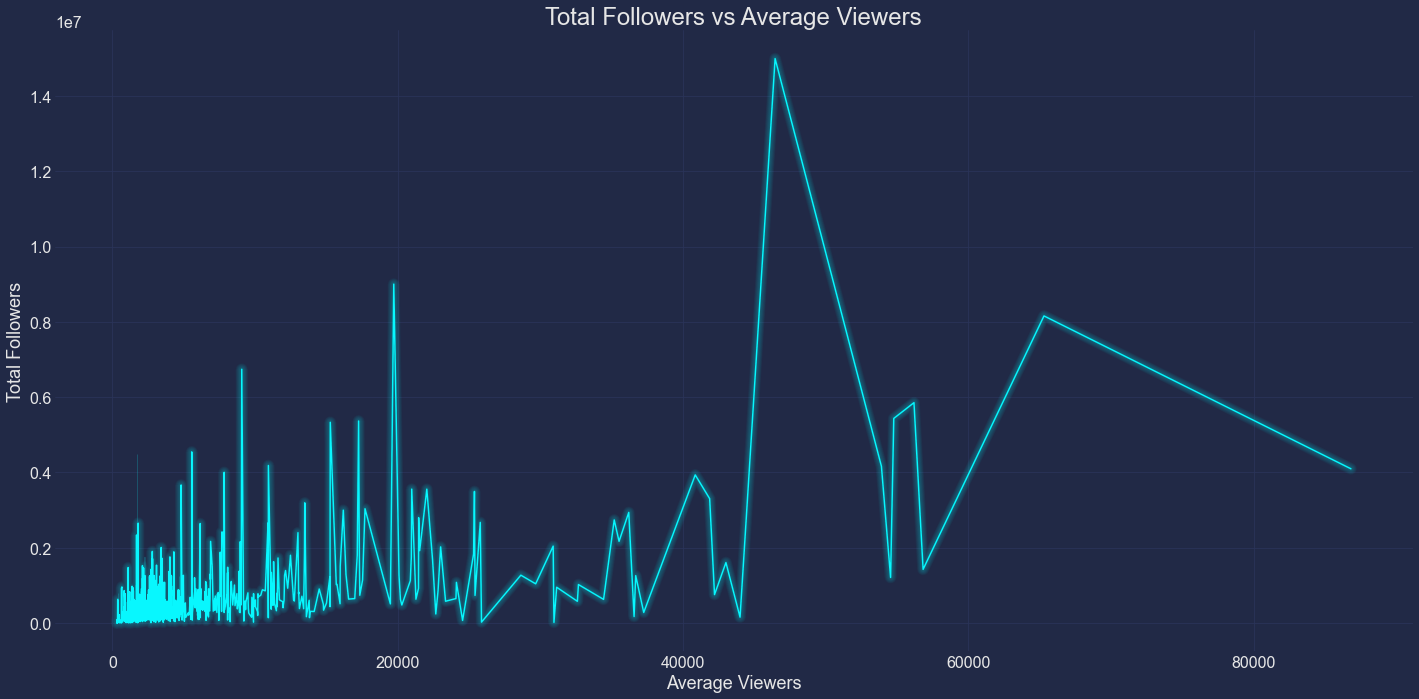

In [47]:
fig = plt.figure(figsize=(20, 10))

sns.lineplot(df['Average Viewers'], df['Total Followers'])
plt.title('Total Followers vs Average Viewers', fontsize = 24)
plt.xlabel('Average Viewers', fontsize=18)
plt.ylabel('Total Followers', fontsize=18)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.savefig('imgs/tfvsav.png', facecolor=fig.get_facecolor())
plt.show()

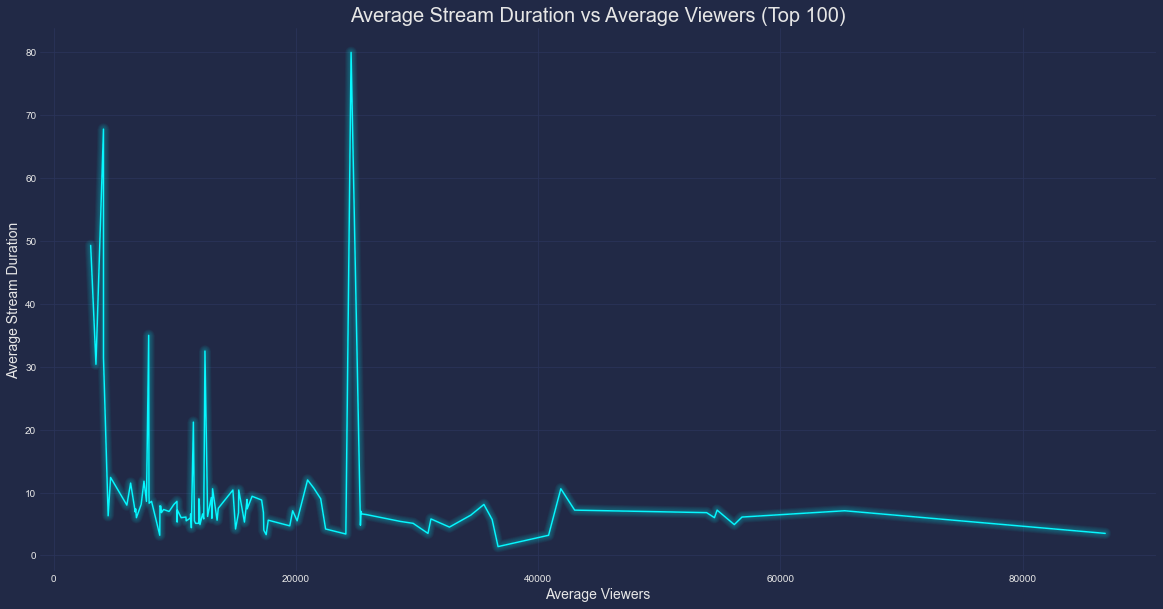

In [14]:
plt.figure(figsize=(20, 10))
sns.lineplot(df['Average Viewers'].head(100), df['Average Stream Duration'].head(100))
plt.title('Average Stream Duration vs Average Viewers (Top 100)', fontsize = 20)
plt.xlabel('Average Viewers', fontsize=14)
plt.ylabel('Average Stream Duration', fontsize=14)
mplcyberpunk.make_lines_glow()
plt.show()

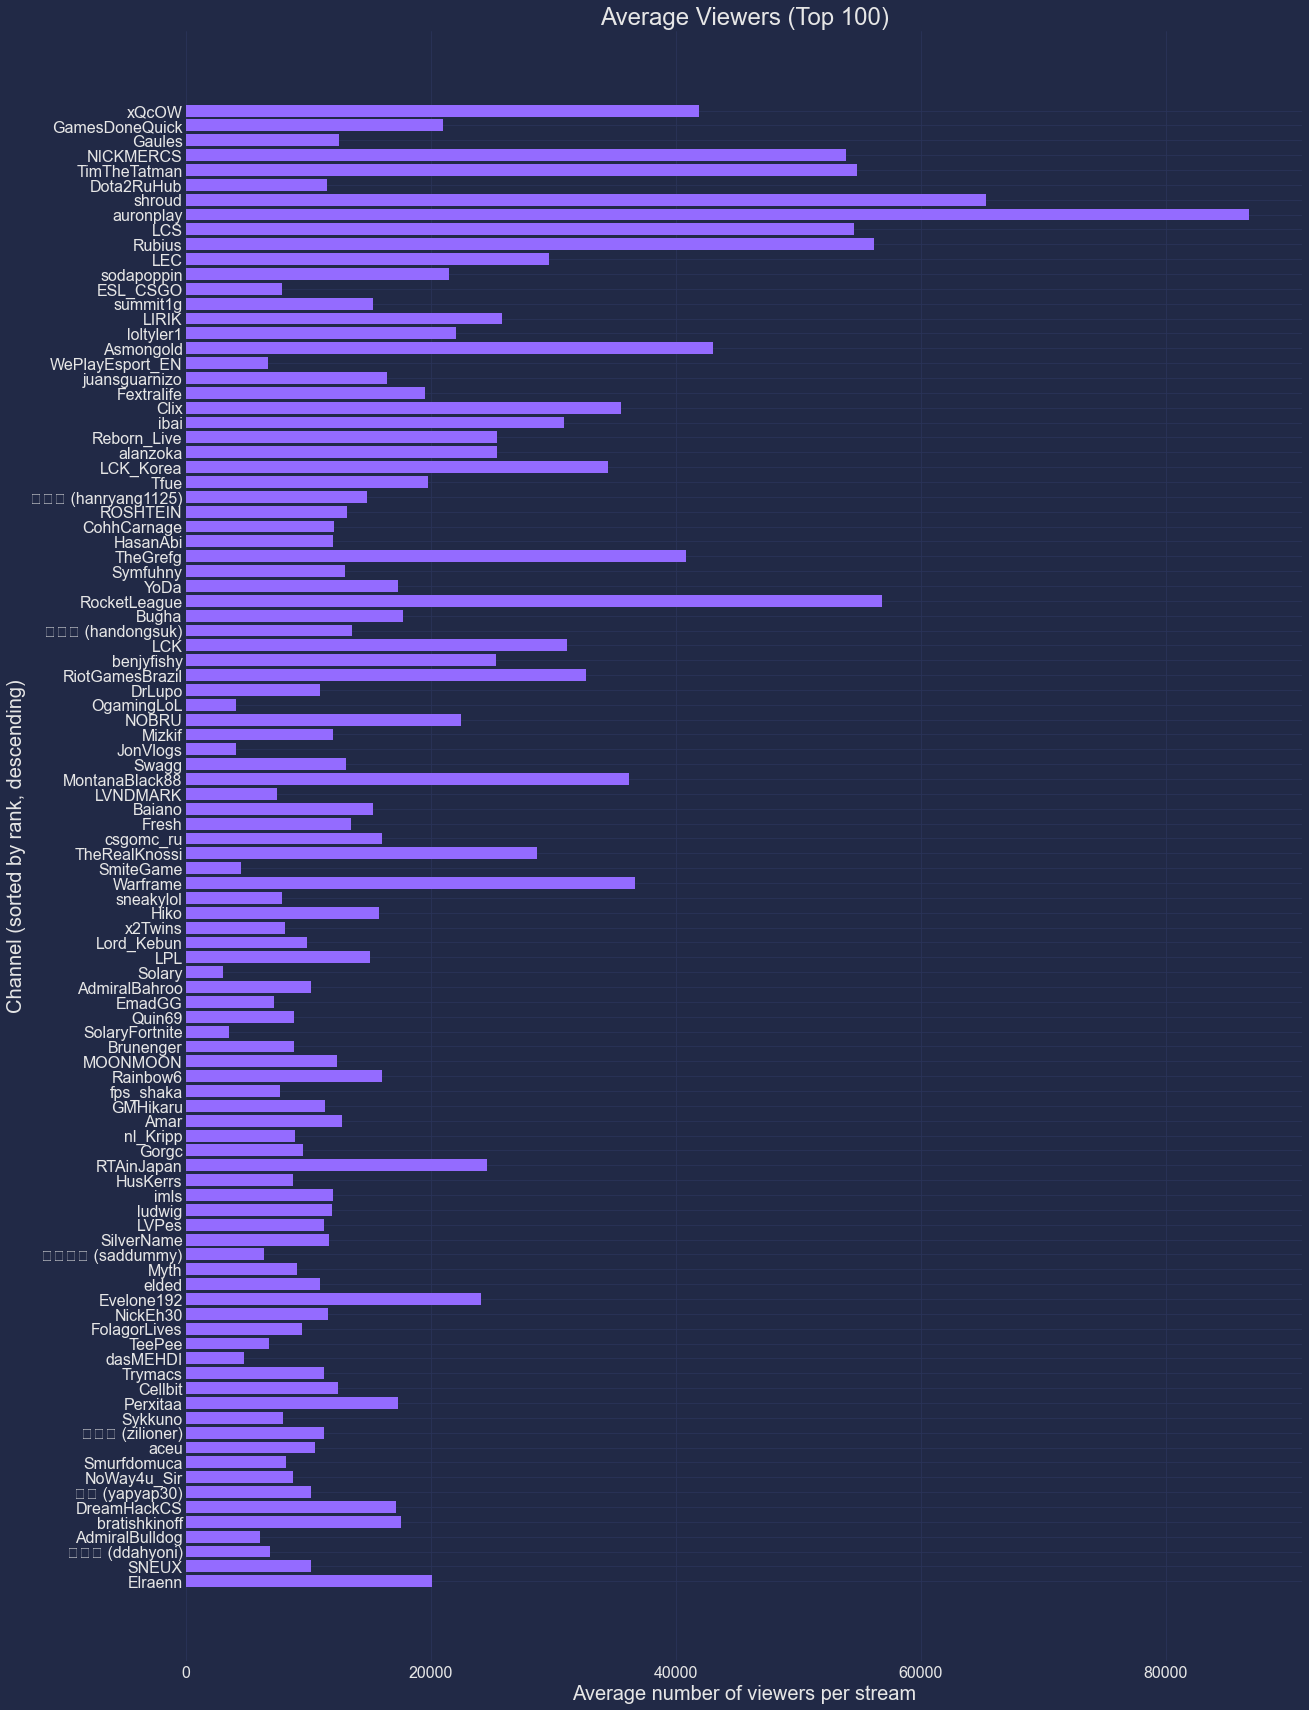

In [21]:
plt.figure(figsize=(20, 30))

temp_x = df['Channel'].head(100)[::-1]
temp_y = df['Average Viewers'].head(100)[::-1]

plt.rcParams.update({'font.size': 16})
plt.barh(temp_x, temp_y, color='#946BFF')

plt.title('Average Viewers (Top 100)', fontsize=24)
plt.xlabel('Average number of viewers per stream', fontsize=20)
plt.ylabel('Channel (sorted by rank, descending)', fontsize=20)
plt.show()

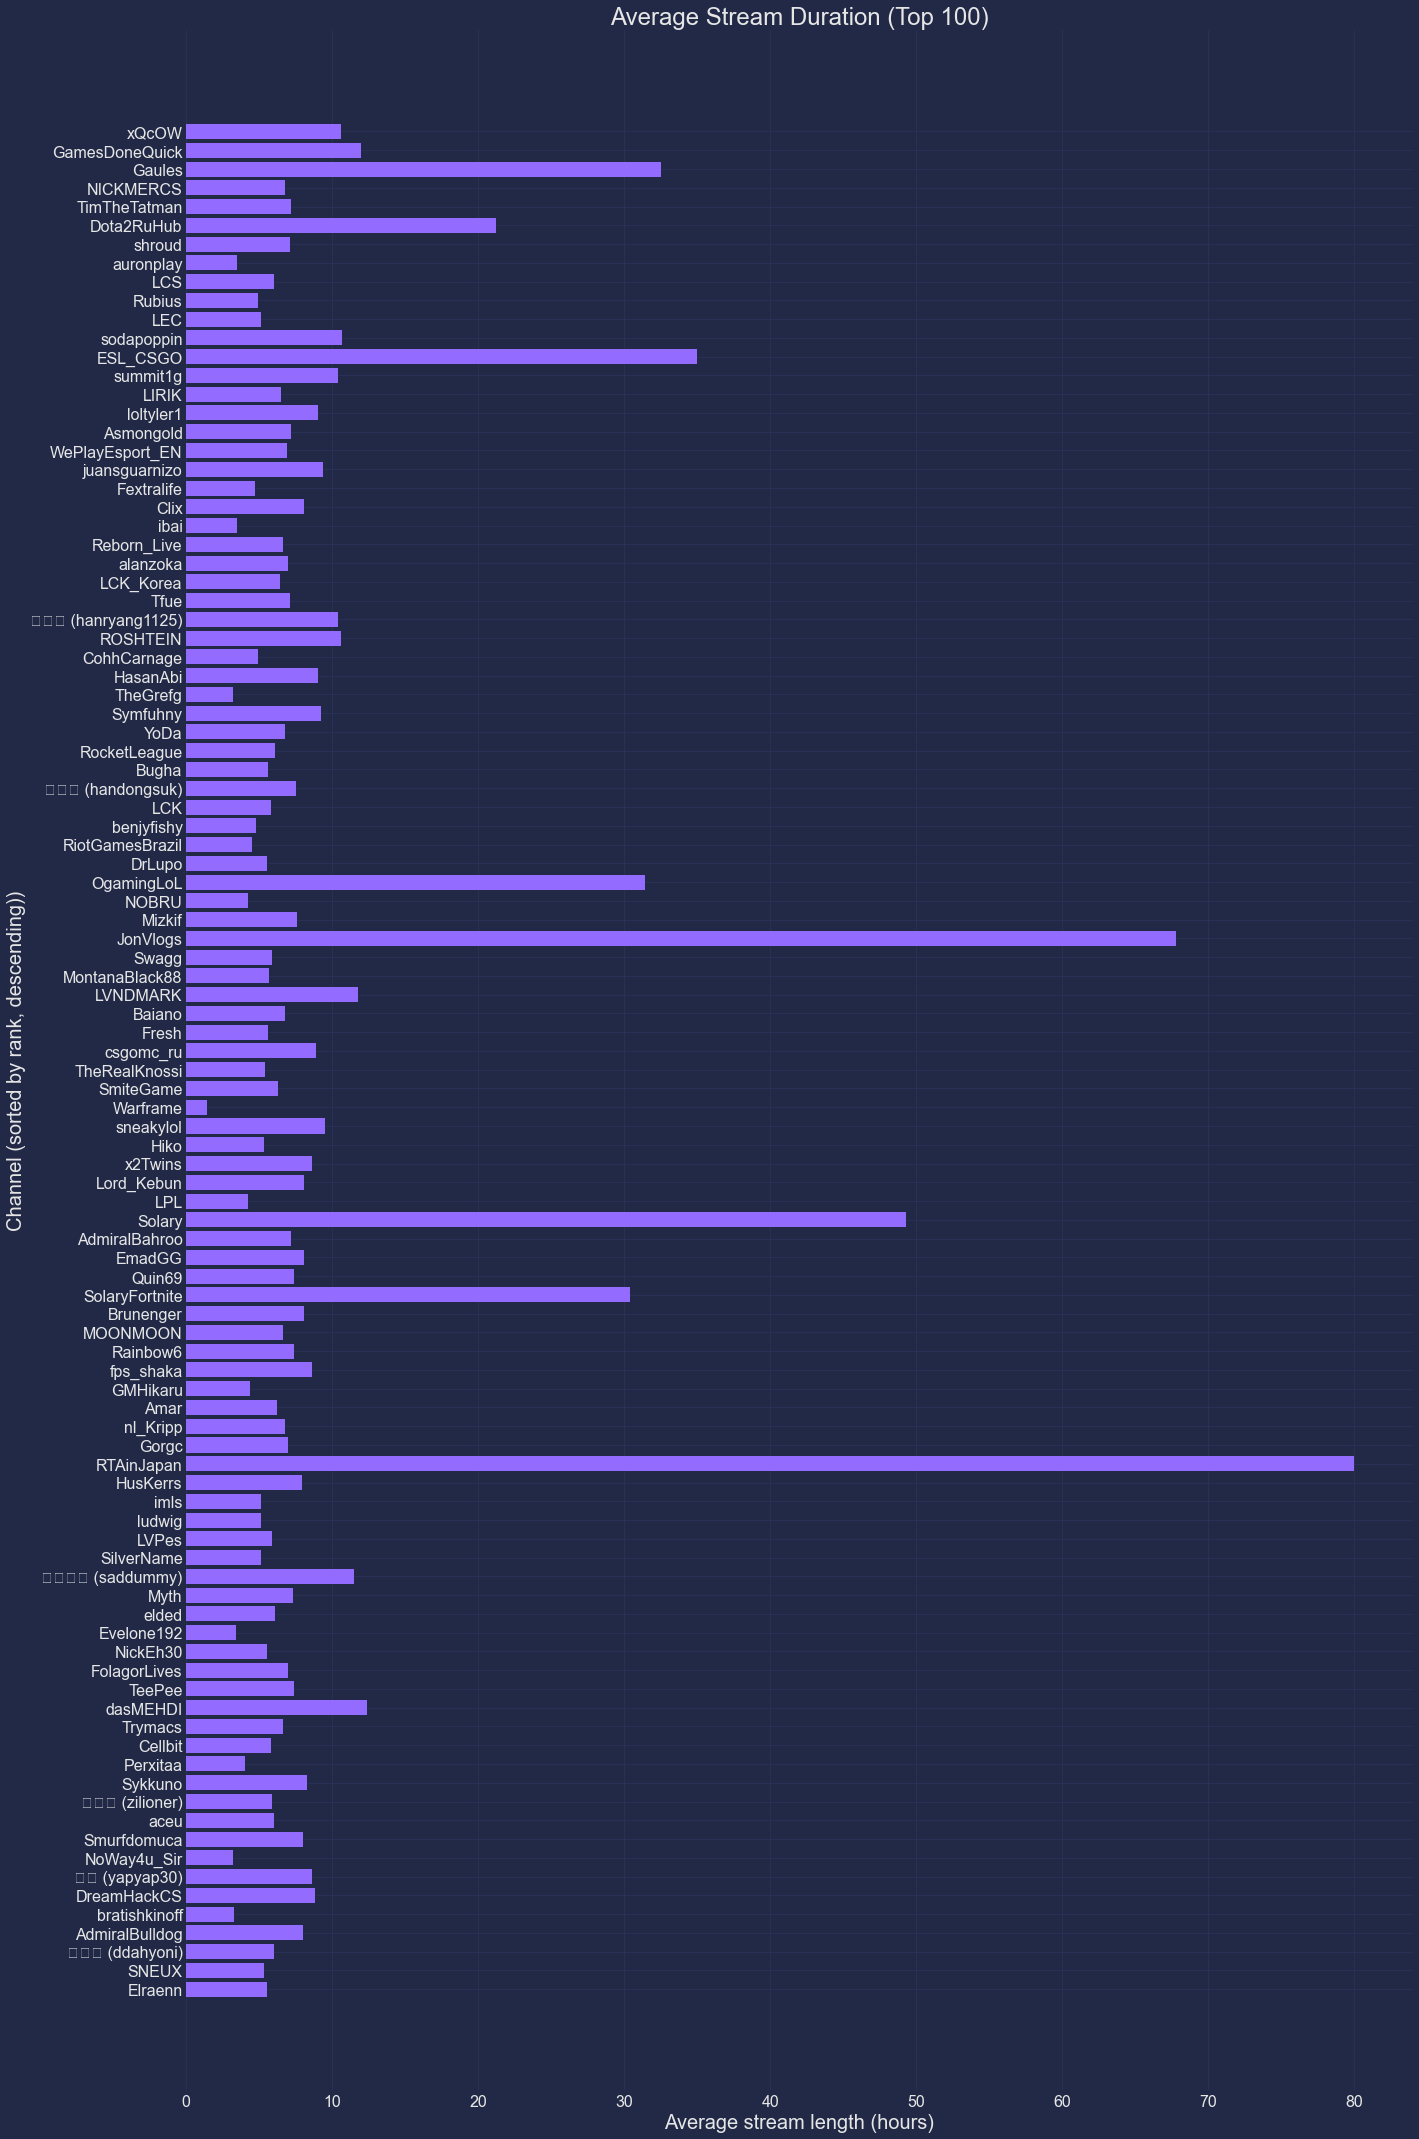

In [45]:
plt.figure(figsize=(20, 30))

temp_x = df['Channel'].head(100)[::-1]
temp_y = df['Average Stream Duration'].head(100)[::-1]

plt.rcParams.update({'font.size': 16})
plt.barh(temp_x, temp_y, color='#946BFF')

plt.title('Average Stream Duration (Top 100)', fontsize=24)
plt.xlabel('Average stream length (hours)', fontsize=20)
plt.ylabel('Channel (sorted by rank, descending))', fontsize=20)

plt.tight_layout()
plt.savefig('imgs/avg_duration.png', facecolor=fig.get_facecolor())
plt.show()

In [27]:
#aggregate games from 3 columns to visualize top overall games played
from collections import Counter

temp1 = df['Game 1'].value_counts()
temp1 = Counter(dict(temp1))

temp2 = df['Game 2'].value_counts()
temp2 = Counter(dict(temp2))

temp3 = df['Game 3'].value_counts()
temp3 = Counter(dict(temp3))

temp = dict(temp1 + temp2 + temp3)
temp = {k: v for k, v in sorted(temp.items(), key=lambda item: -item[1])}

temp_df = pd.DataFrame.from_dict(temp, orient='index').reset_index()
temp_df = temp_df.rename(columns={'index':'Game', 0:'Count'})
#temp_df

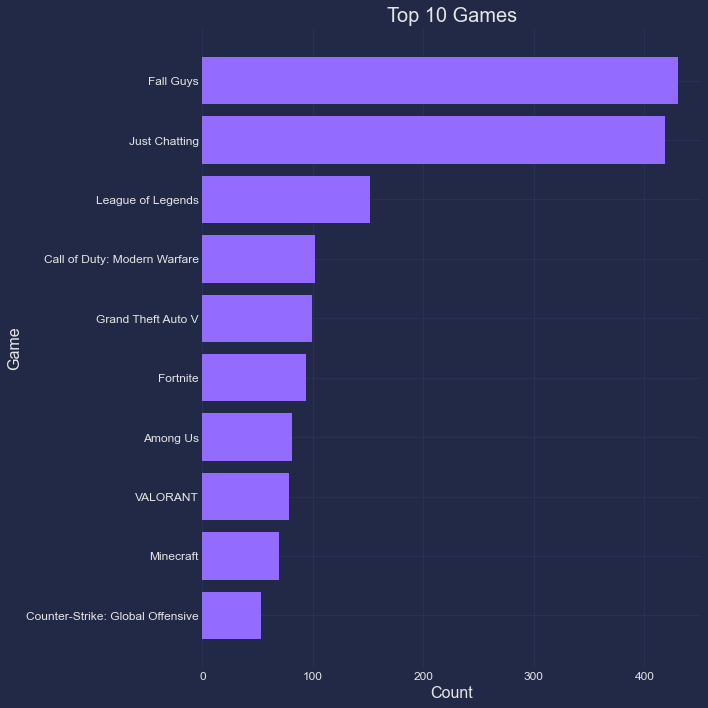

In [43]:
plt.figure(figsize=(10, 10))

plt.rcParams.update({'font.size': 12})
plt.barh(temp_df['Game'].head(10)[::-1], temp_df['Count'].head(10)[::-1],color='#946BFF')

plt.title('Top 10 Games', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Game', fontsize=16)

plt.tight_layout()
plt.savefig('imgs/games.png', facecolor=fig.get_facecolor())
plt.show()

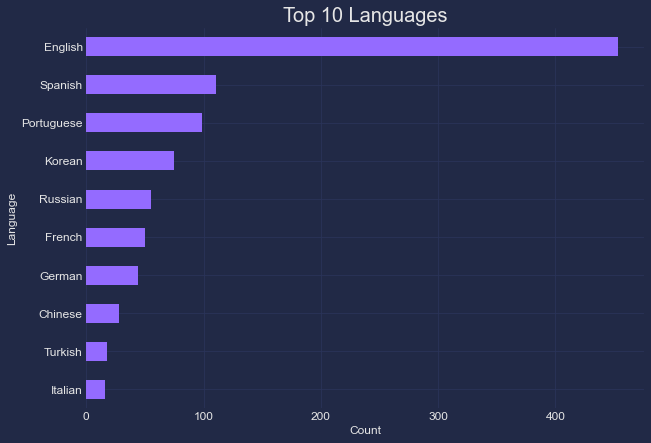

In [29]:
plt.figure(figsize=(10, 7))
df['Language'].value_counts().head(10)[::-1].plot.barh(fontsize=12, color='#946BFF')
plt.title('Top 10 Languages', fontsize=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.show()